In [35]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [8]:
train_df = pd.read_csv('./data/train.csv').drop(['index', 'Unnamed: 0'], axis=1)
test_df = pd.read_csv('./data/test.csv').drop(['index', 'Unnamed: 0'], axis=1)

In [9]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,43.733333,5.466667,-7.420000,11.900000,1.0,41.533333,9.200000,-5.860000,15.966667,3.0,44.200000,3.733333,-2.813333,6.400000,1.0
1,40.866667,14.266667,-0.206667,8.266667,1.0,50.733333,9.866667,-6.540000,12.433333,3.0,65.666667,8.400000,-8.086667,7.300000,2.0
2,65.200000,18.800000,-3.260000,10.200000,2.0,74.800000,44.600000,-7.293333,11.900000,3.0,105.133333,3.066667,-11.266667,3.700000,2.0
3,100.666667,3.400000,-2.993333,4.633333,1.0,91.933333,1.533333,0.900000,6.100000,1.0,88.933333,0.000000,2.020000,10.400000,1.0
4,77.000000,15.066667,-1.653333,12.466667,2.0,85.800000,0.000000,-9.320000,2.533333,2.0,83.266667,0.000000,-7.046667,3.966667,1.0


In [10]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,40.600000,0.000000,0.186667,3.300000,1.0,38.866667,0.333333,1.846667,9.250000,1.0,36.800000,0.400000,-1.000000,5.550000,1.0
1,286.066667,0.000000,-1.366667,2.250000,2.0,281.800000,1.533333,1.806667,4.250000,2.0,276.133333,8.200000,3.333333,7.550000,1.0
2,80.933333,2.666667,-1.006667,10.566667,1.0,80.466667,0.000000,2.342857,6.950000,2.0,77.600000,0.000000,4.493333,3.800000,1.0
3,131.266667,0.000000,-1.926667,6.466667,2.0,127.533333,0.200000,-4.700000,9.566667,2.0,128.066667,0.933333,-4.653333,5.033333,1.0
4,32.866667,1.000000,1.273333,3.533333,2.0,29.400000,0.000000,0.940000,1.766667,2.0,27.933333,0.000000,-1.073333,2.266667,2.0


In [19]:
train_df[

0       43.733333
1       40.866667
2       65.200000
3      100.666667
4       77.000000
          ...    
559     65.200000
560     59.333333
561     59.866667
562     68.266667
563     68.800000
Name: 0, Length: 564, dtype: float64

In [21]:
X = train_df.iloc[...,:13].to_numpy()
Y = train_df.iloc[...,14].to_numpy()

In [26]:
X_test = test_df.iloc[...,:13].to_numpy()
Y_test = test_df.iloc[...,14].to_numpy()

In [13]:
from sklearn import tree

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

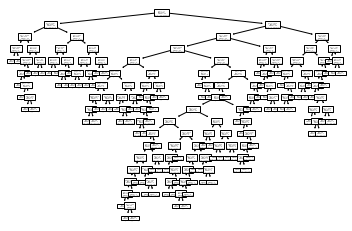

In [32]:
tree.plot_tree(clf);

In [27]:
clf.predict(X_test)

array([1., 2., 2., 2., 2., 2., 2., 2., 3., 3., 2., 2., 4., 4., 4., 4.])

In [29]:
Y_test

array([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4.])

In [31]:
clf.score(X_test, Y_test)

0.6875

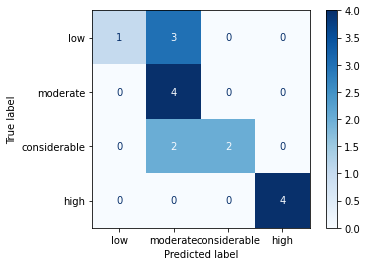

In [40]:
class_names=['low', 'moderate', 'considerable', 'high']
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    Y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
)

In [81]:
clf = tree.DecisionTreeClassifier(class_weight='balanced')
clf = clf.fit(X, Y)
clf.score(X_test, Y_test)

0.4375

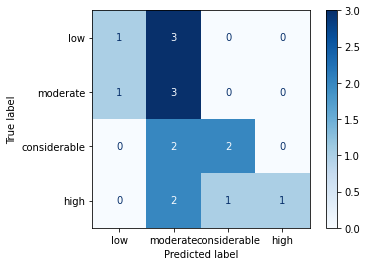

In [82]:
class_names=['low', 'moderate', 'considerable', 'high']
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    Y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
)

In [83]:
clf = tree.DecisionTreeClassifier(max_depth=5, class_weight='balanced')
clf.fit(X, Y).score(X_test, Y_test)

0.625

In [84]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, Y).score(X_test, Y_test)

0.6875

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, Y, cv=10)

array([0.71929825, 0.68421053, 0.8245614 , 0.71929825, 0.73214286,
       0.78571429, 0.71428571, 0.76785714, 0.875     , 0.78571429])

In [86]:
clf.score(X, Y)

0.7978723404255319